## 라이브러리 선언

### 폰트 설치
- 한글 깨짐 방지

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# koreanize_matplotlib

In [2]:
import pandas as pd

# 시각화 모듈 임포트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 시, 에러메시지 무시
import warnings
warnings.filterwarnings(action='ignore')

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

# 한글 깨짐 방지
plt.rc('font', family='NanumBarunGothic')

sns.set(font="NanumBarunGothic",
        rc={"axes.unicode_minus":False},
        style='whitegrid')

## 데이터 로드 및 전처리

In [4]:
df = pd.read_csv('./labeled_data.csv',encoding='utf-8-sig',index_col=0)
df['emotion'] = df['main']+'_'+df['detail']
df.head()

,url,date,source,context,main,detail,agreement,emotion
0,https://x.com/1hhaa_/status/175373236692813461...,2024-02-03,X,보는동안 너무 행복했고 초콜렛이 너무 먹고싶었고 티모시가 잘생겼고 울어!!하는부분이...,기쁨,만족감,70.0,기쁨_만족감
1,https://x.com/makki_home/status/17552181165049...,2024-02-07,X,어릴 때 가 보고 빕스는 거의 처음인데(기억에 없음) 지금 딸기축제 기간이라 만족스...,기쁨,만족감,100.0,기쁨_만족감
2,https://x.com/302NOW/status/175539358101844788...,2024-02-08,X,미리 계좌로 환전해둔 돈을 해외에서 환전수수료 없이 인출 가능한 트레블로그라는 카드...,기쁨,만족감,100.0,기쁨_만족감
3,https://x.com/Hassen_cos/status/17556459885792...,2024-02-09,X,요즘 번아웃도 자꾸 올라오고 무기력해서 종강하고 교류하기도 버거운 상태가 와부렀으요ㅠㅠ,슬픔,무기력,80.0,슬픔_무기력
4,https://x.com/ssosohae1/status/175618221059468...,2024-02-10,X,크라임씬 장똥민이 범행 도구 찾으려고 화장실 탱크 뒤지는데 거기에 진짜 똥 넣어놓은...,기쁨,즐거움,70.0,기쁨_즐거움


In [17]:
# 데이터 개수
len(df)

1043

## 시각화

### 1. 감정 대분류

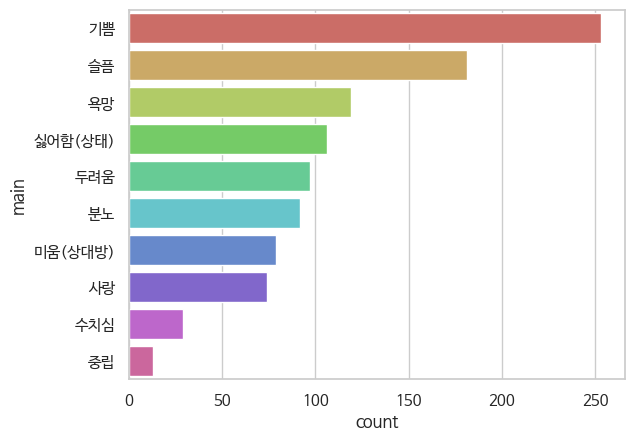

In [6]:
sns.countplot(y='main', data=df, palette='hls', order=df['main'].value_counts().index)
plt.show()

### 2. 감정 소분류

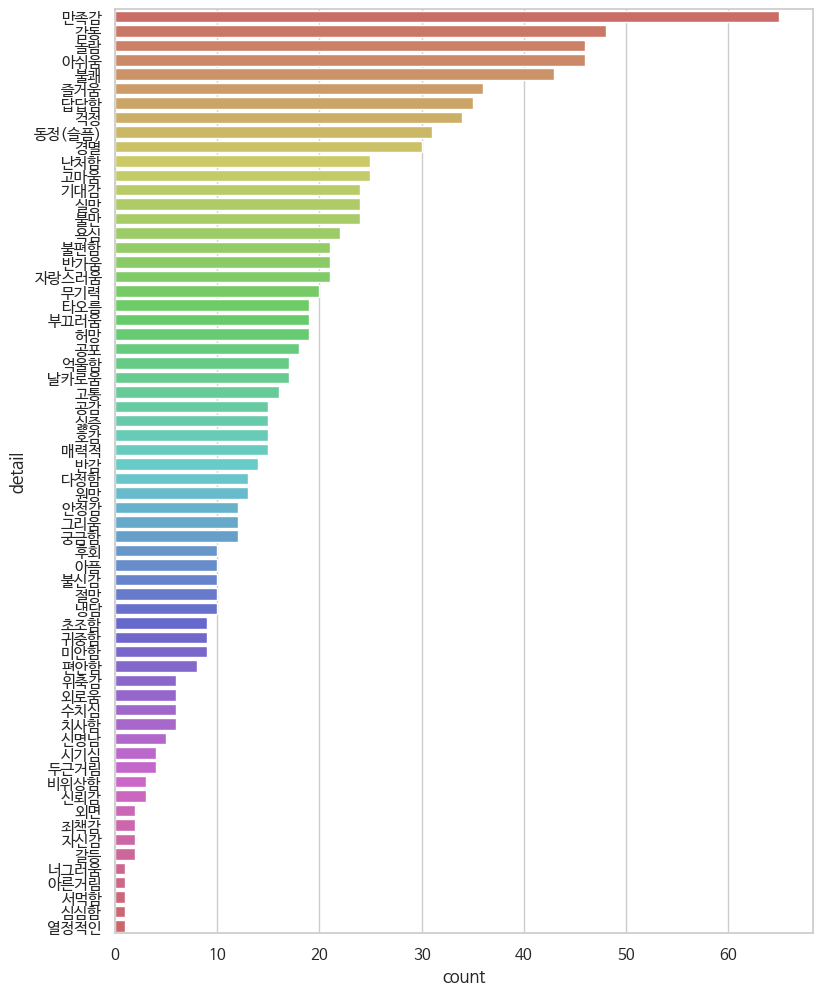

In [5]:
plt.figure(figsize=(9, 12))
sns.countplot(y='detail', data=df, palette='hls', order=df['detail'].value_counts().index)
plt.show()

### 3. 감정 대+소분류

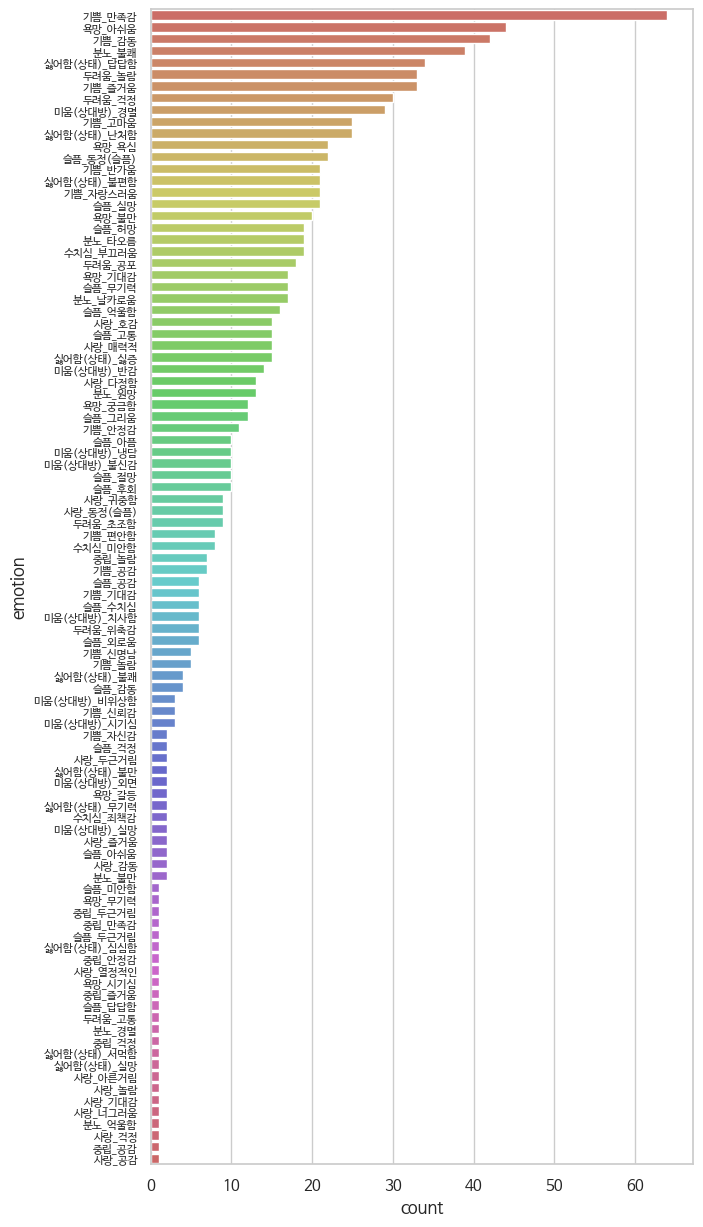

In [6]:
plt.figure(figsize=(7, 15))
ax = sns.countplot(y='emotion', data=df, palette='hls', order=df['emotion'].value_counts().index)
plt.yticks(fontsize=8)
plt.show()

### 4. 감정 동의 비율

In [7]:
# 모든 감정의 동의 비율 평균
all_detail_mean = round(df['agreement'].mean(),2)
all_detail_mean


53.14

In [8]:
# 감정 별 동의 비율 평균 계산
groupped = df.groupby('detail')
detail_mean_df = groupped['agreement'].mean().apply(lambda x : round(x,2)).to_frame()
detail_mean_df = detail_mean_df.sort_values(by='agreement', ascending=False)
detail_mean_df = detail_mean_df.reset_index()

# 감정의 동의 비율 편차 계산
detail_mean_df['deviation'] = detail_mean_df['agreement']-all_detail_mean
detail_mean_df

,detail,agreement,deviation
0,너그러움,100.00,46.86
1,공포,81.94,28.80
2,신명남,75.00,21.86
3,고마움,72.33,19.19
4,그리움,72.08,18.94
...,...,...,...
59,답답함,34.81,-18.33
60,냉담,34.00,-19.14
61,원망,33.08,-20.06
62,신뢰감,29.44,-23.70


#### 1) 감정별 동의 편차 평균

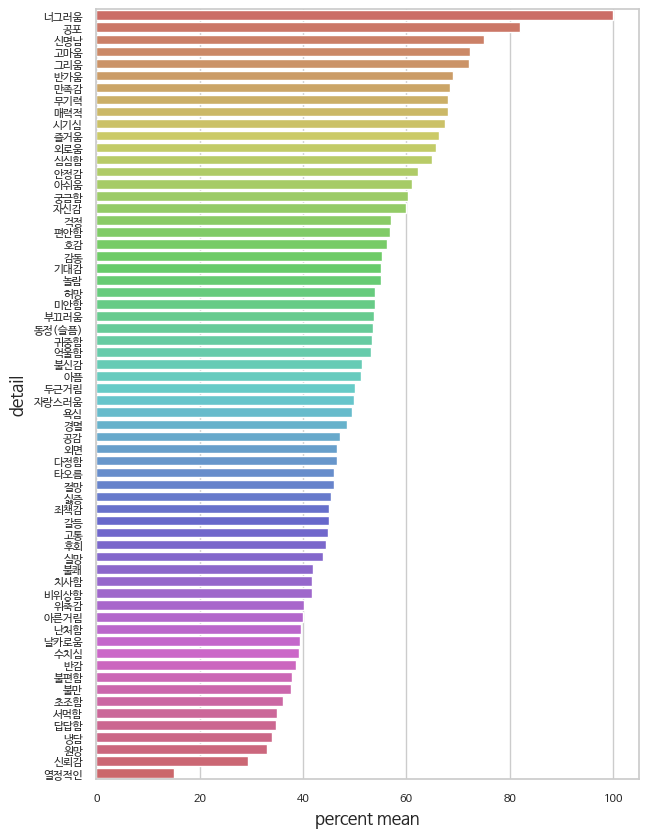

In [15]:
plt.figure(figsize=(7, 10))
ax = sns.barplot(y='detail', x='agreement', data=detail_mean_df, palette='hls')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('percent mean')
plt.show()

#### 2) 감정간 동의 비율 편차

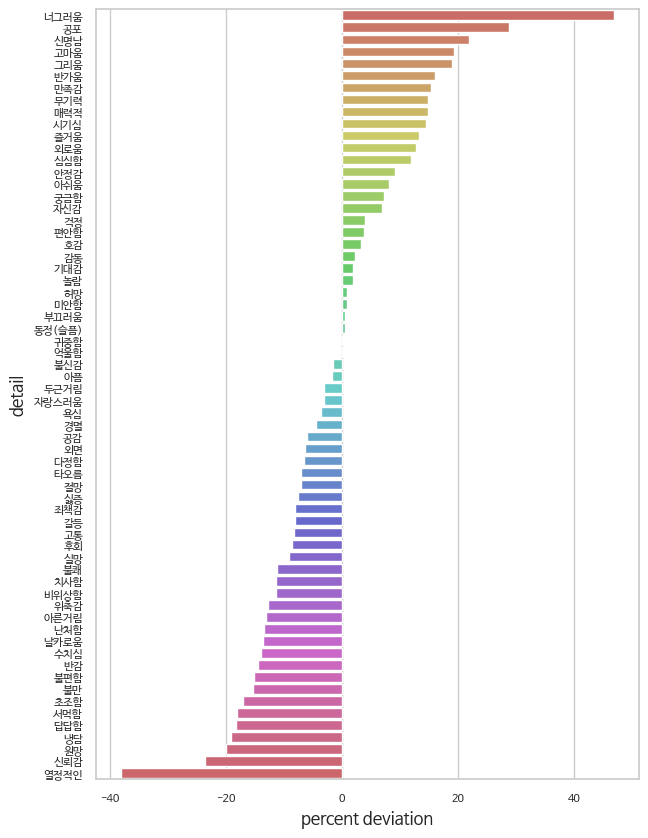

In [16]:
plt.figure(figsize=(7, 10))
ax = sns.barplot(y='detail', x='deviation', data=detail_mean_df, palette='hls')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('percent deviation')
plt.show()